# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [1]:
!pip freeze > requirements.txt

In [2]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug
!pip install torchvision

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.1/280.1 kB 2.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.3/83.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.0 MB/s eta 0:00:00
  Created wheel for pyinstrument-cext: filename=pyinstrument_cext-0.2.4-cp310-cp310-linux_x86_64.whl size=6296 sha256=f71a9ab8d7c32e03a762ef378cf27e1ce5c635c05de72f87bc5e85d0221d529e
  Stored in directory: /home/ec2-user/.cache/pip/wheels/0f/8b/7a/5f7fd1dd6d3cbb3d350d4c832c5e2f962687749f6d67d573a6
Successfully built pyinstrument-cext
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.3
    Uninstalling protobuf-4.25.3:
      Successfully uninstalled protobuf-4.25.3


In [3]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [4]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
#!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
#!unzip dogImages.zip
#!find dogImages/. -type f | wc -l
#!ls dogImages/valid -l | wc -l
#!find dogImages/train/. -type f | wc -l

In [5]:
import sagemaker
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)

sagemaker_session = sagemaker.Session()

bucket = sagemaker_session.default_bucket()
prefix = "sagemaker/cd0387-project-resnet-50"

role = sagemaker.get_execution_role()

In [6]:
# TODO: Upload the data to an S3 bucket. You can use the sagemaker_session object, boto3 or the AWS CLI
#inputs = sagemaker_session.upload_data(path="dogImages", bucket=bucket, key_prefix=prefix)
#print("input spec (in this case, just an S3 path): {}".format(inputs))

In [7]:
import torchvision
import torch
from torchvision import datasets, models, transforms
import os

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(256),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(256),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = './dogImages'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'valid']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [8]:
print(class_names)

['001.Affenpinscher', '002.Afghan_hound', '003.Airedale_terrier', '004.Akita', '005.Alaskan_malamute', '006.American_eskimo_dog', '007.American_foxhound', '008.American_staffordshire_terrier', '009.American_water_spaniel', '010.Anatolian_shepherd_dog', '011.Australian_cattle_dog', '012.Australian_shepherd', '013.Australian_terrier', '014.Basenji', '015.Basset_hound', '016.Beagle', '017.Bearded_collie', '018.Beauceron', '019.Bedlington_terrier', '020.Belgian_malinois', '021.Belgian_sheepdog', '022.Belgian_tervuren', '023.Bernese_mountain_dog', '024.Bichon_frise', '025.Black_and_tan_coonhound', '026.Black_russian_terrier', '027.Bloodhound', '028.Bluetick_coonhound', '029.Border_collie', '030.Border_terrier', '031.Borzoi', '032.Boston_terrier', '033.Bouvier_des_flandres', '034.Boxer', '035.Boykin_spaniel', '036.Briard', '037.Brittany', '038.Brussels_griffon', '039.Bull_terrier', '040.Bulldog', '041.Bullmastiff', '042.Cairn_terrier', '043.Canaan_dog', '044.Cane_corso', '045.Cardigan_welsh_

In [9]:
print(dataset_sizes)
print(class_names)

{'train': 6680, 'valid': 835}
['001.Affenpinscher', '002.Afghan_hound', '003.Airedale_terrier', '004.Akita', '005.Alaskan_malamute', '006.American_eskimo_dog', '007.American_foxhound', '008.American_staffordshire_terrier', '009.American_water_spaniel', '010.Anatolian_shepherd_dog', '011.Australian_cattle_dog', '012.Australian_shepherd', '013.Australian_terrier', '014.Basenji', '015.Basset_hound', '016.Beagle', '017.Bearded_collie', '018.Beauceron', '019.Bedlington_terrier', '020.Belgian_malinois', '021.Belgian_sheepdog', '022.Belgian_tervuren', '023.Bernese_mountain_dog', '024.Bichon_frise', '025.Black_and_tan_coonhound', '026.Black_russian_terrier', '027.Bloodhound', '028.Bluetick_coonhound', '029.Border_collie', '030.Border_terrier', '031.Borzoi', '032.Boston_terrier', '033.Bouvier_des_flandres', '034.Boxer', '035.Boykin_spaniel', '036.Briard', '037.Brittany', '038.Brussels_griffon', '039.Bull_terrier', '040.Bulldog', '041.Bullmastiff', '042.Cairn_terrier', '043.Canaan_dog', '044.Can

In [10]:
print(image_datasets)
print(dataloaders)
print(len(class_names))

{'train': Dataset ImageFolder
    Number of datapoints: 6680
    Root location: ./dogImages/train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(256, 256), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           ), 'valid': Dataset ImageFolder
    Number of datapoints: 835
    Root location: ./dogImages/valid
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=warn)
               CenterCrop(size=(256, 256))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )}
{'train': <torch.utils.data.dataloader.DataLoader object at 0x7f6a55f1c550>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x7f6a55f1c580>}
133


/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


tensor([72, 93, 18,  1])


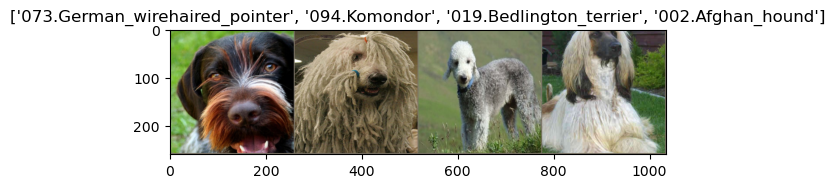

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#show images
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))
print(classes)
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [12]:
from sagemaker.pytorch import PyTorch
from sagemaker.inputs import TrainingInput

In [13]:
#!pip install amazon-ai-s3-data-loader

In [14]:
#TODO: Declare your HP ranges, metrics etc.

hyperparameters = {
    #"gpu": True,
    "lr": ContinuousParameter(0.001, 0.1),
    "batch-size": CategoricalParameter([8, 16, 32, 64, 128]),
    "epochs": IntegerParameter(2, 10),
    #"model": "resnet50",
}

In [15]:
objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

In [16]:
#TODO: Create estimators for your HPs
s3_data_path = 's3://sagemaker-us-east-1-733710257842/sagemaker/cd0387-project-resnet-50/'
s3_model_path = 's3://sagemaker-us-east-1-733710257842/sagemaker/cd0387-project-resnet-50/model'
s3_output_path = 's3://sagemaker-us-east-1-733710257842/sagemaker/cd0387-project-resnet-50/output'

# TODO: Your estimator here
estimator = PyTorch(
    entry_point="hpo.py",
    role=role,
    source_dir="scripts",
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.g4dn.xlarge",
    output_path = s3_output_path,
)

tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameters,
    metric_definitions,
    max_jobs=2,
    max_parallel_jobs=2,
    objective_type=objective_type,
) #TODO: Create your HyperparameterTuner Object# TODO: Your HP tuner here

In [17]:
sagemaker_session = sagemaker.Session()

bucket = sagemaker_session.default_bucket()
prefix = "sagemaker/cd0387-project-resnet-50"

role = sagemaker.get_execution_role()

print(bucket)
print(prefix)

sagemaker-us-east-1-733710257842
sagemaker/cd0387-project-resnet-50


In [18]:
train_data_loc = 's3://sagemaker-us-east-1-733710257842/sagemaker/cd0387-project-resnet-50'
#val_data_loc = 's3://sagemaker-us-east-1-433073421675/sagemaker/cd0387-project-resnet-50/valid'
#test_data_loc = 's3://sagemaker-us-east-1-433073421675/sagemaker/cd0387-project-resnet-50/test'

channels = {
    'training': train_data_loc,
    #'validation': val_data_loc,
    #'test': test_data_loc
}

In [19]:
# TODO: Fit your HP Tuner
tuner.fit(inputs=channels, wait=True) 

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


............................................................................................................................................................................!


In [20]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator()

#Get the hyperparameters of the best trained model
best_hp = best_estimator.hyperparameters()


2024-04-03 05:04:57 Starting - Preparing the instances for training
2024-04-03 05:04:57 Downloading - Downloading the training image
2024-04-03 05:04:57 Training - Training image download completed. Training in progress.
2024-04-03 05:04:57 Uploading - Uploading generated training model
2024-04-03 05:04:57 Completed - Resource retained for reuse


## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [21]:
from sagemaker.debugger import Rule, rule_configs, ProfilerRule, DebuggerHookConfig, CollectionConfig, ProfilerConfig, FrameworkProfile
#from smdebug.trials import create_trial
#from smdebug.core.modes import ModeKeys

In [22]:
# TODO: Set up debugging and profiling rules and hooks
rules = [
    Rule.sagemaker(rule_configs.loss_not_decreasing()),
    ProfilerRule.sagemaker(rule_configs.LowGPUUtilization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
]

profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=5)
)
collection_config = [CollectionConfig(
    name="CrossEntropyLoss_output_0", 
    parameters={
        "include_regex": "CrossEntropyLoss_output_0",
        "train.save_interval": "5", 
        "eval.save_interval": "1"})]
    
debugger_config = DebuggerHookConfig(
    collection_configs=collection_config
)

Framework profiling will be deprecated from tensorflow 2.12 and pytorch 2.0 in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [24]:
print(best_hp)

{'_tuning_objective_metric': '"average test loss"', 'batch-size': '"64"', 'epochs': '4', 'lr': '0.008695136438781736', 'sagemaker_container_log_level': '20', 'sagemaker_estimator_class_name': '"PyTorch"', 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"', 'sagemaker_job_name': '"pytorch-training-2024-04-03-04-52-15-895"', 'sagemaker_program': '"hpo.py"', 'sagemaker_region': '"us-east-1"', 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-733710257842/pytorch-training-2024-04-03-04-52-15-895/source/sourcedir.tar.gz"'}


In [28]:
# TODO: Create and fit an estimator
#best_hyperparameters = {'batch_size': 256, 'epochs': 6, 'lr': 0.0012003609534198224 }

best_hyperparameters = {'batch_size': int(best_hp['batch-size'].strip('"')), 'epochs': best_hp['epochs'], 'lr': best_hp['lr'] }


estimator = PyTorch(
    entry_point="train_model.py",
    source_dir="scripts",
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.g4dn.xlarge",
    output_path = s3_output_path,
    hyperparameters = best_hyperparameters,
    profiler_config = profiler_config, 
    debugger_hook_config = debugger_config, 
    rules = rules 
)

In [29]:
estimator.fit({'training': train_data_loc}, wait=True)

INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: pytorch-training-2024-04-03-05-25-08-605


2024-04-03 05:25:09 Starting - Starting the training job...
2024-04-03 05:25:38 Starting - Preparing the instances for trainingLossNotDecreasing: InProgress
VanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
LowGPUUtilization: InProgress
ProfilerReport: InProgress
...
2024-04-03 05:26:07 Downloading - Downloading input data..................
2024-04-03 05:29:04 Downloading - Downloading the training image............
2024-04-03 05:31:08 Training - Training image download completed. Training in progress...bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2024-04-03 05:31:18,530 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2024-04-03 05:31:18,567 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2024-04-03 05:31:18,571 sagemaker_pytorch_container.training INFO     Invoking user train

In [30]:
path = estimator.latest_job_debugger_artifacts_path()
print(path)

s3://sagemaker-us-east-1-733710257842/sagemaker/cd0387-project-resnet-50/output/pytorch-training-2024-04-03-05-25-08-605/debug-output


In [31]:
import smdebug.trials as smd
from smdebug.core.modes import ModeKeys
import matplotlib.pyplot as plt

path = estimator.latest_job_debugger_artifacts_path()
#path = "s3://sagemaker-us-east-1-433073421675/sagemaker/cd0387-project-resnet-50/output/pytorch-training-2024-03-31-16-43-47-880/debug-output"
trial = smd.create_trial(path=path)
print(f"Saved these tensors: {trial.tensor_names()}")
#print(f"Loss values during evaluation were {trial.tensor('CrossEntropyLoss_output_0').values(mode=ModeKeys.TRAIN)}")



[2024-04-03 05:39:00.354 ip-172-16-138-33.ec2.internal:24252 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2024-04-03 05:39:00.367 ip-172-16-138-33.ec2.internal:24252 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-733710257842/sagemaker/cd0387-project-resnet-50/output/pytorch-training-2024-04-03-05-25-08-605/debug-output
[2024-04-03 05:39:00.746 ip-172-16-138-33.ec2.internal:24252 WARNING s3handler.py:184] Encountered the exception An error occurred while reading from response stream: ('Connection broken: IncompleteRead(0 bytes read, 2012 more expected)', IncompleteRead(0 bytes read, 2012 more expected)) while reading s3://sagemaker-us-east-1-733710257842/sagemaker/cd0387-project-resnet-50/output/pytorch-training-2024-04-03-05-25-08-605/debug-output/index/000000000/000000000050_worker_0.json . Will retry now
[2024-04-03 05:39:02.736 ip-172-16-138-33.ec2.internal:24252 INFO trial.py:197] Training has ended, will refresh one final time in 1 sec.

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

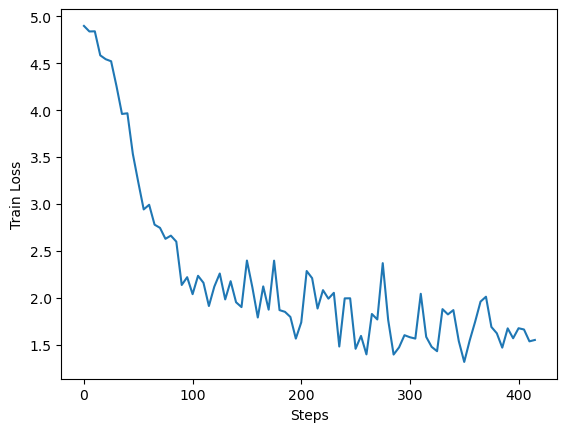

In [32]:
# TODO: Display the profiler output
plt.ylabel('Train Loss')
plt.xlabel('Steps')
plt.plot(trial.steps(mode=ModeKeys.TRAIN),list(trial.tensor('CrossEntropyLoss_output_0').values(mode=ModeKeys.TRAIN).values()))
plt.show()

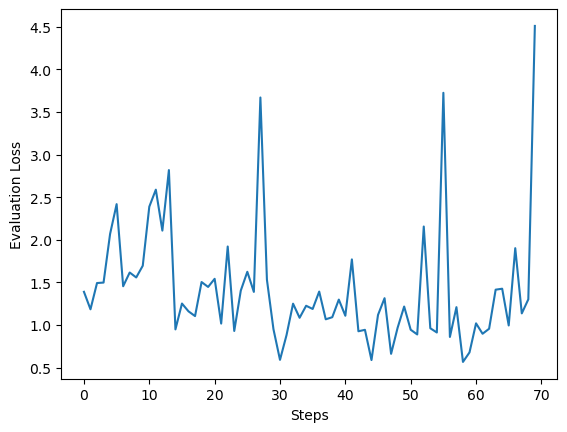

In [33]:
plt.ylabel('Evaluation Loss')
plt.xlabel('Steps')
plt.plot(trial.steps(mode=ModeKeys.EVAL),list(trial.tensor('CrossEntropyLoss_output_0').values(mode=ModeKeys.EVAL).values()))
plt.show()

In [34]:
import smdebug
from smdebug.profiler.analysis.notebook_utils.training_job import TrainingJob
from smdebug.profiler.analysis.notebook_utils.timeline_charts import TimelineCharts

# Specify the training job name
training_job_name = estimator.latest_training_job.job_name
region = "us-east-1"
# Load the training job data
tj = TrainingJob(training_job_name, region)



ProfilerConfig:{'S3OutputPath': 's3://sagemaker-us-east-1-733710257842/sagemaker/cd0387-project-resnet-50/output', 'ProfilingIntervalInMilliseconds': 500, 'ProfilingParameters': {'DataloaderProfilingConfig': '{"StartStep": 0, "NumSteps": 5, "MetricsRegex": ".*", }', 'DetailedProfilingConfig': '{"StartStep": 0, "NumSteps": 5, }', 'FileOpenFailThreshold': '50', 'HorovodProfilingConfig': '{"StartStep": 0, "NumSteps": 5, }', 'LocalPath': '/opt/ml/output/profiler', 'PythonProfilingConfig': '{"StartStep": 0, "NumSteps": 5, "ProfilerName": "cprofile", "cProfileTimer": "total_time", }', 'RotateFileCloseIntervalInSeconds': '60', 'RotateMaxFileSizeInBytes': '10485760', 'SMDataParallelProfilingConfig': '{"StartStep": 0, "NumSteps": 5, }'}, 'DisableProfiler': False}
s3 path:s3://sagemaker-us-east-1-733710257842/sagemaker/cd0387-project-resnet-50/output/pytorch-training-2024-04-03-05-25-08-605/profiler-output


In [35]:
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"

In [36]:
#rule_output_path = "s3://sagemaker-us-east-1-433073421675/sagemaker/cd0387-project-resnet-50/output/pytorch-training-2024-03-31-16-43-47-880/rule-output"
print(f"You will find the profiler report in {rule_output_path}")

! aws s3 ls {rule_output_path} --recursive

You will find the profiler report in s3://sagemaker-us-east-1-733710257842/sagemaker/cd0387-project-resnet-50/outputpytorch-training-2024-04-03-05-25-08-605/rule-output


In [37]:
! aws s3 cp {rule_output_path} ./ --recursive

In [38]:
import IPython

IPython.display.HTML(filename="ProfilerReport/profiler-output/profiler-report.html")

## Model Deploying

In [39]:
# TODO: Deploy your model to an endpoint

from sagemaker.pytorch import PyTorchModel

# Create a PyTorchModel object
pytorch_model = PyTorchModel(
    model_data=estimator.model_data,
    role=role,
    source_dir="scripts",
    entry_point='inference.py',
    framework_version='1.8.0',
    py_version='py36',
)

# predictor=estimator.deploy(initial_instance_count=1, instance_type="ml.t2.medium") # TODO: Add your deployment configuration like instance type and number of instances

In [40]:
print(estimator.model_data)

s3://sagemaker-us-east-1-733710257842/sagemaker/cd0387-project-resnet-50/output/pytorch-training-2024-04-03-05-25-08-605/output/model.tar.gz


In [45]:
# Deploy the model
predictor = pytorch_model.deploy(
    initial_instance_count=1,
    instance_type='ml.m5.large',
)

INFO:sagemaker:Repacking model artifact (s3://sagemaker-us-east-1-733710257842/sagemaker/cd0387-project-resnet-50/output/pytorch-training-2024-04-03-05-25-08-605/output/model.tar.gz), script artifact (scripts), and dependencies ([]) into single tar.gz file located at s3://sagemaker-us-east-1-733710257842/pytorch-inference-2024-04-03-05-41-26-943/model.tar.gz. This may take some time depending on model size...
INFO:sagemaker:Creating model with name: pytorch-inference-2024-04-03-05-56-17-284
INFO:sagemaker:Creating endpoint-config with name pytorch-inference-2024-04-03-05-56-17-888
INFO:sagemaker:Creating endpoint with name pytorch-inference-2024-04-03-05-56-17-888


-------!

Display Image class 101:


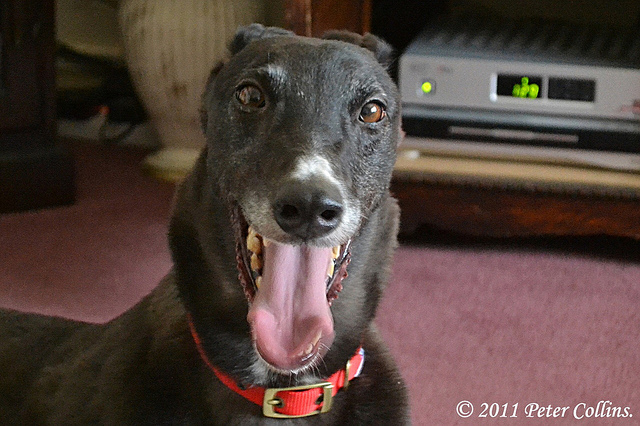

ModelError: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received server error (500) from primary with message "cannot identify image file <_io.BytesIO object at 0x7f067b8fcdb0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/sagemaker_inference/transformer.py", line 126, in transform
    result = self._transform_fn(self._model, input_data, content_type, accept)
  File "/opt/conda/lib/python3.6/site-packages/sagemaker_inference/transformer.py", line 215, in _default_transform_fn
    data = self._input_fn(input_data, content_type)
  File "/opt/ml/model/code/inference.py", line 100, in input_fn
    raise e
  File "/opt/ml/model/code/inference.py", line 87, in input_fn
    image = Image.open(io.BytesIO(request_body))
  File "/opt/conda/lib/python3.6/site-packages/PIL/Image.py", line 2931, in open
    "cannot identify image file %r" % (filename if filename else fp)
PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f067b8fcdb0>
". See https://us-east-1.console.aws.amazon.com/cloudwatch/home?region=us-east-1#logEventViewer:group=/aws/sagemaker/Endpoints/pytorch-inference-2024-04-03-05-56-17-888 in account 733710257842 for more information.

In [54]:
# TODO: Run an prediction on the endpoint
from PIL import Image
import io

test_image_path = "./dogImages/test/081.Greyhound/Greyhound_05526.jpg"

with open(test_image_path, "rb") as f:
    payload = f.read()
    print("Display Image class 101:")
    display(Image.open(io.BytesIO(payload)))

response = predictor.predict(payload, initial_args={"ContentType": "application/x-image"})
predicted_dog_breed = np.argmax(response, 1) + 1

print(f"Prediction: {predicted_dog_breed}")


#image = # TODO: Your code to load and preprocess image to send to endpoint for prediction
#response = predictor.predict(image)

In [51]:
import boto3

# Create a SageMaker client
sagemaker = boto3.client('sagemaker')

response = sagemaker.list_endpoints(SortBy='CreationTime', SortOrder='Descending')
latest_endpoint = response['Endpoints'][0]['EndpointName']
runtime = boto3.client('sagemaker-runtime')

response = runtime.invoke_endpoint(
    EndpointName=latest_endpoint,
    ContentType='application/x-image',
    Body=payload  
)

print(response)

{'ResponseMetadata': {'RequestId': 'f4f7b207-82b2-4307-a3be-6ec6ff7cf8fc', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'f4f7b207-82b2-4307-a3be-6ec6ff7cf8fc', 'x-amzn-invoked-production-variant': 'AllTraffic', 'date': 'Wed, 03 Apr 2024 06:08:44 GMT', 'content-type': 'application/json', 'content-length': '3284', 'connection': 'keep-alive'}, 'RetryAttempts': 0}, 'ContentType': 'application/json', 'InvokedProductionVariant': 'AllTraffic', 'Body': <botocore.response.StreamingBody object at 0x7f6afb915ab0>}


In [52]:
import json

streaming_body = response['Body']
json_response_body = streaming_body.read()
decoded_response_body = json_response_body.decode('utf-8')
prediction = json.loads(decoded_response_body)

print(prediction)

[[-25.776561737060547, -14.214912414550781, -15.537301063537598, -13.67551326751709, -19.046297073364258, -20.000402450561523, -10.350207328796387, -10.486544609069824, -12.871065139770508, -14.147562980651855, -7.149538040161133, -22.37449073791504, -31.18752670288086, -9.522759437561035, -22.403308868408203, -19.32439613342285, -29.384031295776367, -11.764748573303223, -8.43785285949707, -6.964849472045898, -17.863040924072266, -23.41453742980957, -36.48607635498047, -18.721595764160156, -18.782365798950195, -19.950109481811523, -23.22566032409668, -14.550874710083008, -22.571151733398438, -15.404565811157227, -13.513102531433105, -14.906815528869629, -19.73080062866211, -19.341854095458984, -19.206953048706055, -24.884151458740234, -19.332128524780273, -24.437410354614258, -3.436359405517578, -24.095033645629883, -17.786235809326172, -18.603973388671875, -6.969669342041016, -11.428986549377441, -14.166518211364746, -26.200531005859375, -10.117515563964844, -7.536229133605957, -7.792

In [53]:
import numpy as np

# Convert the prediction to a numpy array
prediction_array = np.array(prediction)

# Find the index of the maximum value
predicted_class = np.argmax(prediction_array)

print(class_names[predicted_class])

081.Greyhound


In [44]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: pytorch-inference-2024-04-03-05-41-27-581
INFO:sagemaker:Deleting endpoint with name: pytorch-inference-2024-04-03-05-41-27-581
